### A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


sns.set(rc={'figure.figsize':(12,12)}, style='darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')

### A) A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

In [2]:
# Extracting the data & have a quick look
df = pd.read_csv("ingredient.csv")
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [3]:
# Find out the number of rows & features in the dataset
df.shape

(214, 9)

In [4]:
# A quick glance on the data's characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


Based on the output above, we understand that the dataset contains 9 numerical features / additives for us to use in analysis later.

In [5]:
# Find out the statistics value for each of the features.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
a,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
b,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
c,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
d,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
e,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
f,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
g,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
h,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
i,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


<AxesSubplot:xlabel='i', ylabel='Density'>

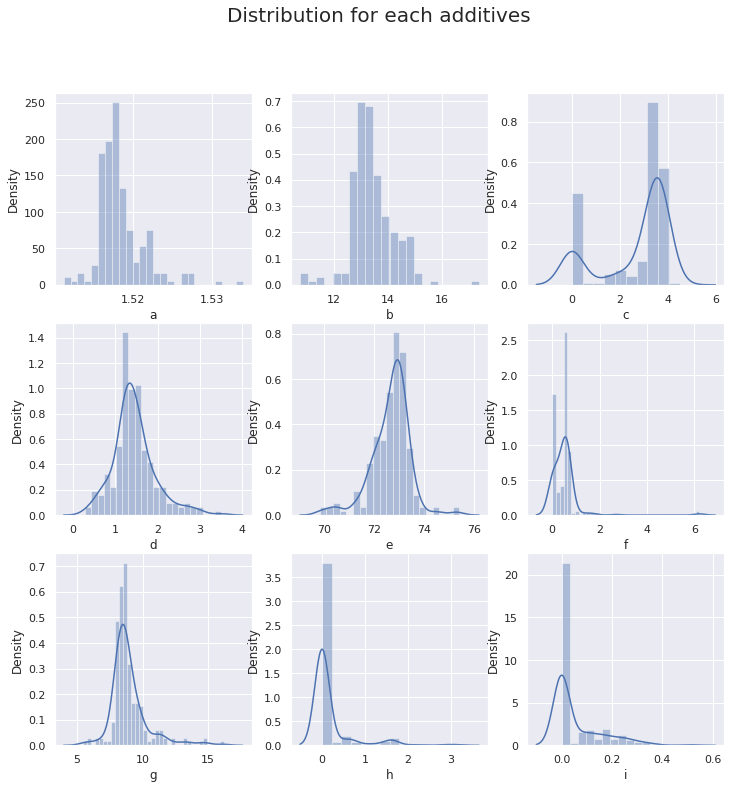

In [6]:
# Plot out the distribution of each of the features.
fig, axs = plt.subplots(3, 3)

plt.suptitle("Distribution for each additives", fontsize=20)

sns.distplot(df['a'], ax=axs[0, 0])
sns.distplot(df['b'], ax=axs[0, 1])
sns.distplot(df['c'], ax=axs[0, 2])

sns.distplot(df['d'], ax=axs[1, 0])
sns.distplot(df['e'], ax=axs[1, 1])
sns.distplot(df['f'], ax=axs[1, 2])

sns.distplot(df['g'], ax=axs[2, 0])
sns.distplot(df['h'], ax=axs[2, 1])
sns.distplot(df['i'], ax=axs[2, 2])

<AxesSubplot:xlabel='i'>

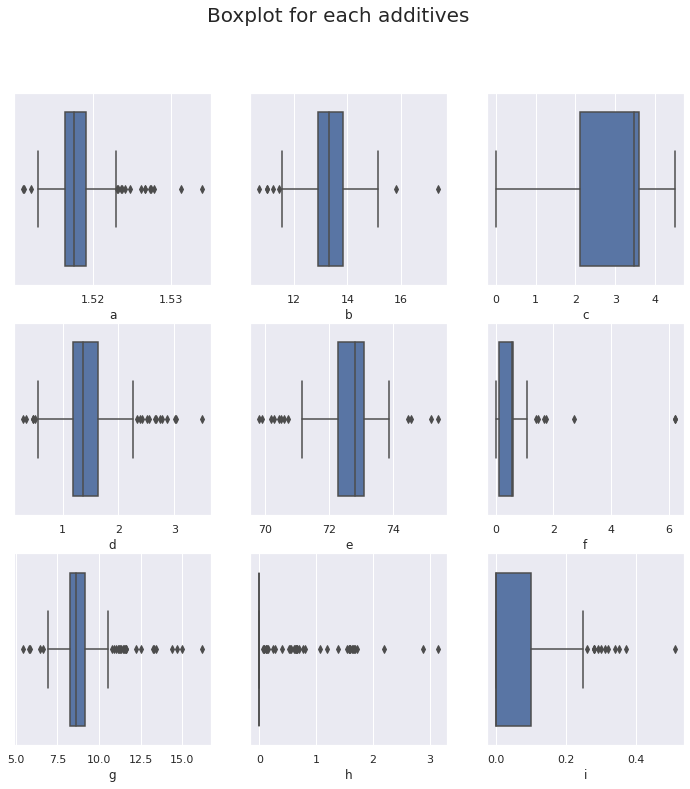

In [7]:
# Plot out the boxplot for each of the features.
fig, axs = plt.subplots(3, 3)

plt.suptitle("Boxplot for each additives", fontsize=20)

sns.boxplot(df['a'], ax=axs[0, 0])
sns.boxplot(df['b'], ax=axs[0, 1])
sns.boxplot(df['c'], ax=axs[0, 2])

sns.boxplot(df['d'], ax=axs[1, 0])
sns.boxplot(df['e'], ax=axs[1, 1])
sns.boxplot(df['f'], ax=axs[1, 2])

sns.boxplot(df['g'], ax=axs[2, 0])
sns.boxplot(df['h'], ax=axs[2, 1])
sns.boxplot(df['i'], ax=axs[2, 2])

Text(0.5, 1.0, 'i')

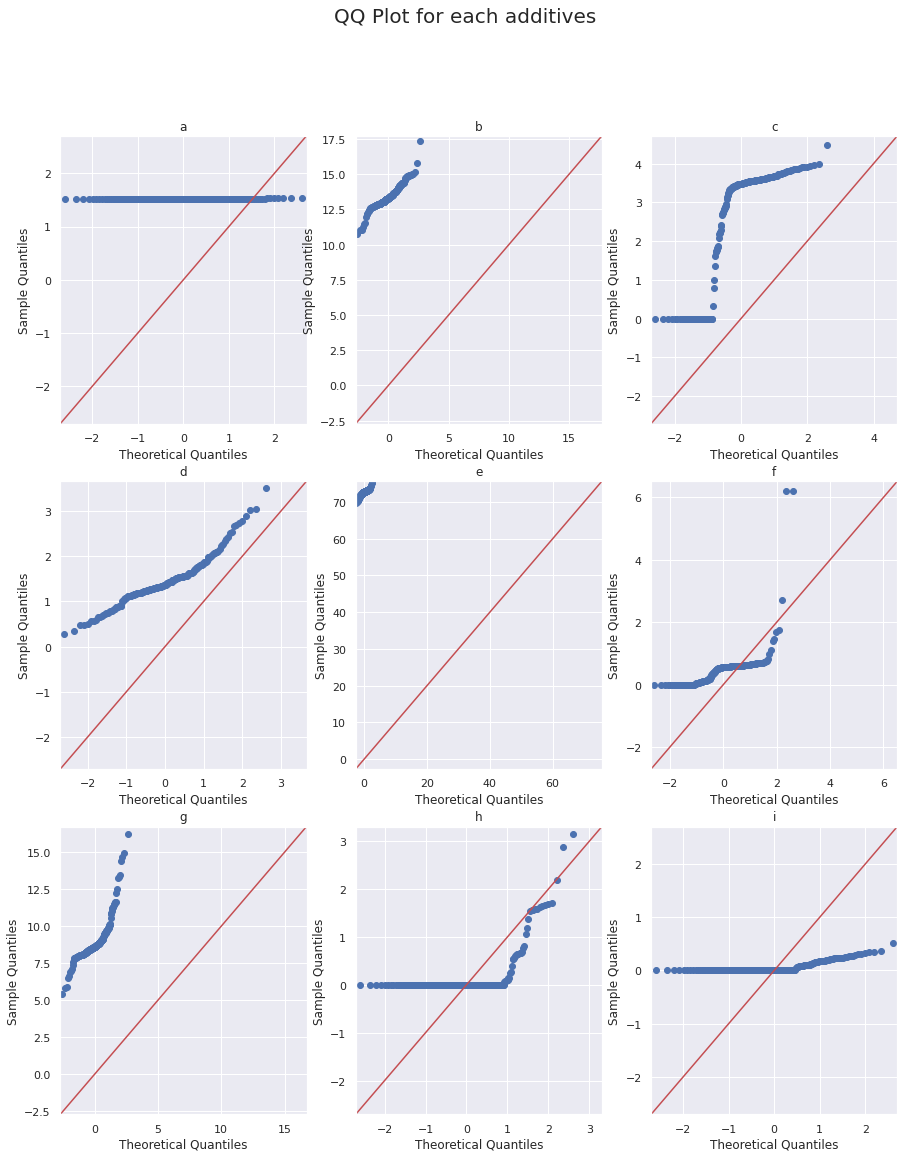

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))

plt.suptitle("QQ Plot for each additives", fontsize=20)

sm.qqplot(df['a'], line='45',ax=axs[0, 0])
axs[0, 0].set_title('a')
sm.qqplot(df['b'], line='45',ax=axs[0, 1])
axs[0, 1].set_title('b')
sm.qqplot(df['c'], line='45',ax=axs[0, 2])
axs[0, 2].set_title('c')

sm.qqplot(df['d'], line='45',ax=axs[1, 0])
axs[1, 0].set_title('d')
sm.qqplot(df['e'], line='45',ax=axs[1, 1])
axs[1, 1].set_title('e')
sm.qqplot(df['f'], line='45',ax=axs[1, 2])
axs[1, 2].set_title('f')

sm.qqplot(df['g'], line='45',ax=axs[2, 0])
axs[2, 0].set_title('g')
sm.qqplot(df['h'], line='45',ax=axs[2, 1])
axs[2, 1].set_title('h')
sm.qqplot(df['i'], line='45',ax=axs[2, 2])
axs[2, 2].set_title('i')

From above graphs we can find out that Additive C has bimodal & most of the additives are not in normal distribution.

In [9]:
# Convert the dataframe to a numpy array
a = df['a'].values
b = df['b'].values
c = df['c'].values
d = df['d'].values
e = df['e'].values
f = df['f'].values
g = df['g'].values
h = df['h'].values
i = df['i'].values


In [10]:
# Test out the hypothesis
stats.kruskal(a, b, c, d, e, f, g, h, i)

KruskalResult(statistic=1707.6383280751495, pvalue=0.0)

As the P value is below significance level, which is 0.05, the null hypothesis is rejected. The test shows that the additives are indeed difference with each other. 

<AxesSubplot:>

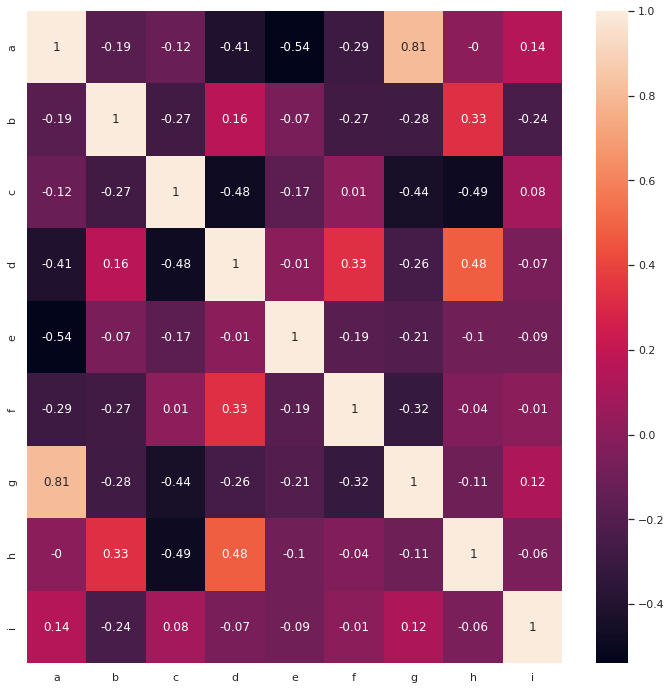

In [11]:
# Find out correlation between additives
corr = round(df.corr(), 2)
sns.heatmap(corr, annot=True)

Seems like Additive A & G is highly positively linear with correlation coefficient of value 0.81. Quantifying a relationship between two variables using the correlation coefficient only tells half the story, because it measures the strength of a relationship in samples only. If we obtained a different sample, we would obtain different correlation coefficient values, and therefore potentially different conclusions. 

The alternative hypothesis is always what we are trying to prove, in our case, we try to prove that there is a significant correlation between additive A and G in the population (i.e. ρ ≠ 0).

The null hypothesis is the hypothesis that we are trying to provide evidence against, in our case, we try to provide evidence againt the hypothesis that there is not a significant linear correlation between additive A and G in the population (i.e. ρ = 0)

**Mann-Whitney U** Test is performed in hypothesis testing procedure.

In [12]:
# Performed Mann-Whitney U Test between additive A and additive G
stats.mannwhitneyu(a, g)

MannwhitneyuResult(statistic=0.0, pvalue=6.41324618896848e-72)

Since the p value of the Mann-Whitney U test is below the significance level, 0.05, we reject the null hypothesis in favor of the alternative. We conclude that the correlation is statically significant at population level.

### B) A graphical analysis of the additives, including a distribution study.

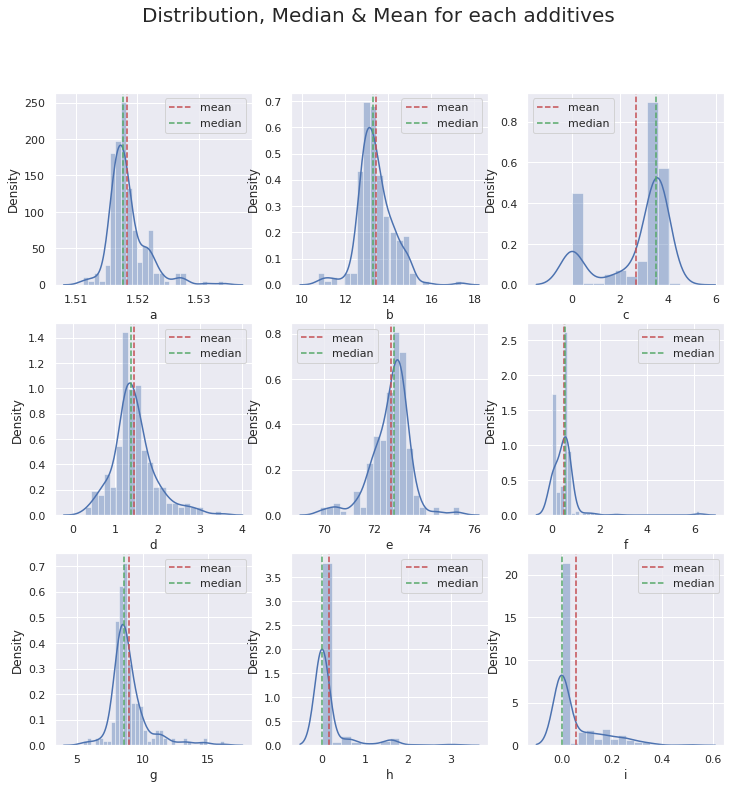

In [13]:
# Create a distribution plot for each of the features & plot mean & median on the same plot.
fig, axs = plt.subplots(3, 3)

plt.suptitle("Distribution, Median & Mean for each additives", fontsize=20)

sns.distplot(df['a'], ax=axs[0, 0])
axs[0,0].axvline(df['a'].mean(), color='r', linestyle='--', label='mean')
axs[0,0].axvline(df['a'].median(), color='g', linestyle='--', label='median')
axs[0,0].legend()

sns.distplot(df['b'], ax=axs[0, 1])
axs[0,1].axvline(df['b'].mean(), color='r', linestyle='--', label='mean')
axs[0,1].axvline(df['b'].median(), color='g', linestyle='--', label='median')
axs[0,1].legend()

sns.distplot(df['c'], ax=axs[0, 2])
axs[0,2].axvline(df['c'].mean(), color='r', linestyle='--', label='mean')
axs[0,2].axvline(df['c'].median(), color='g', linestyle='--', label='median')
axs[0,2].legend()

sns.distplot(df['d'], ax=axs[1, 0])
axs[1,0].axvline(df['d'].mean(), color='r', linestyle='--', label='mean')
axs[1,0].axvline(df['d'].median(), color='g', linestyle='--', label='median')
axs[1,0].legend()

sns.distplot(df['e'], ax=axs[1, 1])
axs[1,1].axvline(df['e'].mean(), color='r', linestyle='--', label='mean')
axs[1,1].axvline(df['e'].median(), color='g', linestyle='--', label='median')
axs[1,1].legend()

sns.distplot(df['f'], ax=axs[1, 2])
axs[1,2].axvline(df['f'].mean(), color='r', linestyle='--', label='mean')
axs[1,2].axvline(df['f'].median(), color='g', linestyle='--', label='median')
axs[1,2].legend()

sns.distplot(df['g'], ax=axs[2, 0])
axs[2,0].axvline(df['g'].mean(), color='r', linestyle='--', label='mean')
axs[2,0].axvline(df['g'].median(), color='g', linestyle='--', label='median')
axs[2,0].legend()

sns.distplot(df['h'], ax=axs[2, 1])
axs[2,1].axvline(df['h'].mean(), color='r', linestyle='--', label='mean')
axs[2,1].axvline(df['h'].median(), color='g', linestyle='--', label='median')
axs[2,1].legend()

sns.distplot(df['i'], ax=axs[2, 2])
axs[2,2].axvline(df['i'].mean(), color='r', linestyle='--', label='mean')
axs[2,2].axvline(df['i'].median(), color='g', linestyle='--', label='median')
axs[2,2].legend()


Skewness of the graphs can be studied based on position of median & mean in the distribution. In case of a positively skewed frequency distribution, the mean is always greater than median & for a negatively skewed frequency distribution, the mean is always lesser than median. Most of the distribution is skewed.

<AxesSubplot:xlabel='i'>

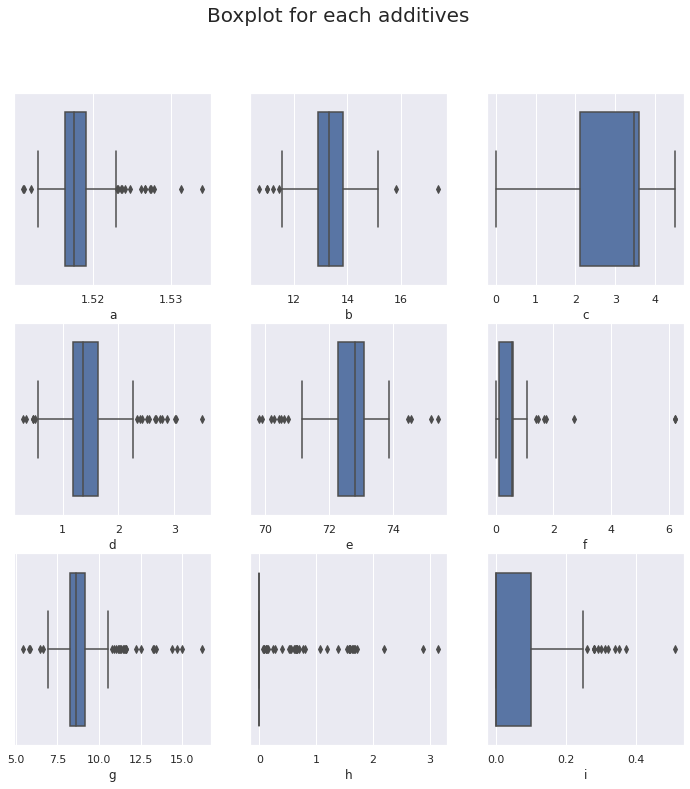

In [14]:
# Plot out the boxplot for each of the features.
fig, axs = plt.subplots(3, 3)

plt.suptitle("Boxplot for each additives", fontsize=20)

sns.boxplot(df['a'], ax=axs[0, 0])
sns.boxplot(df['b'], ax=axs[0, 1])
sns.boxplot(df['c'], ax=axs[0, 2])

sns.boxplot(df['d'], ax=axs[1, 0])
sns.boxplot(df['e'], ax=axs[1, 1])
sns.boxplot(df['f'], ax=axs[1, 2])

sns.boxplot(df['g'], ax=axs[2, 0])
sns.boxplot(df['h'], ax=axs[2, 1])
sns.boxplot(df['i'], ax=axs[2, 2])

Boxplot for Addtive C shows that it has a wide range in the distribution since its boxplot is wider compared to the other additives. MOreover, boxplot for Additive H shows that in its distribution, it contains more outliers compared to the other addtives.

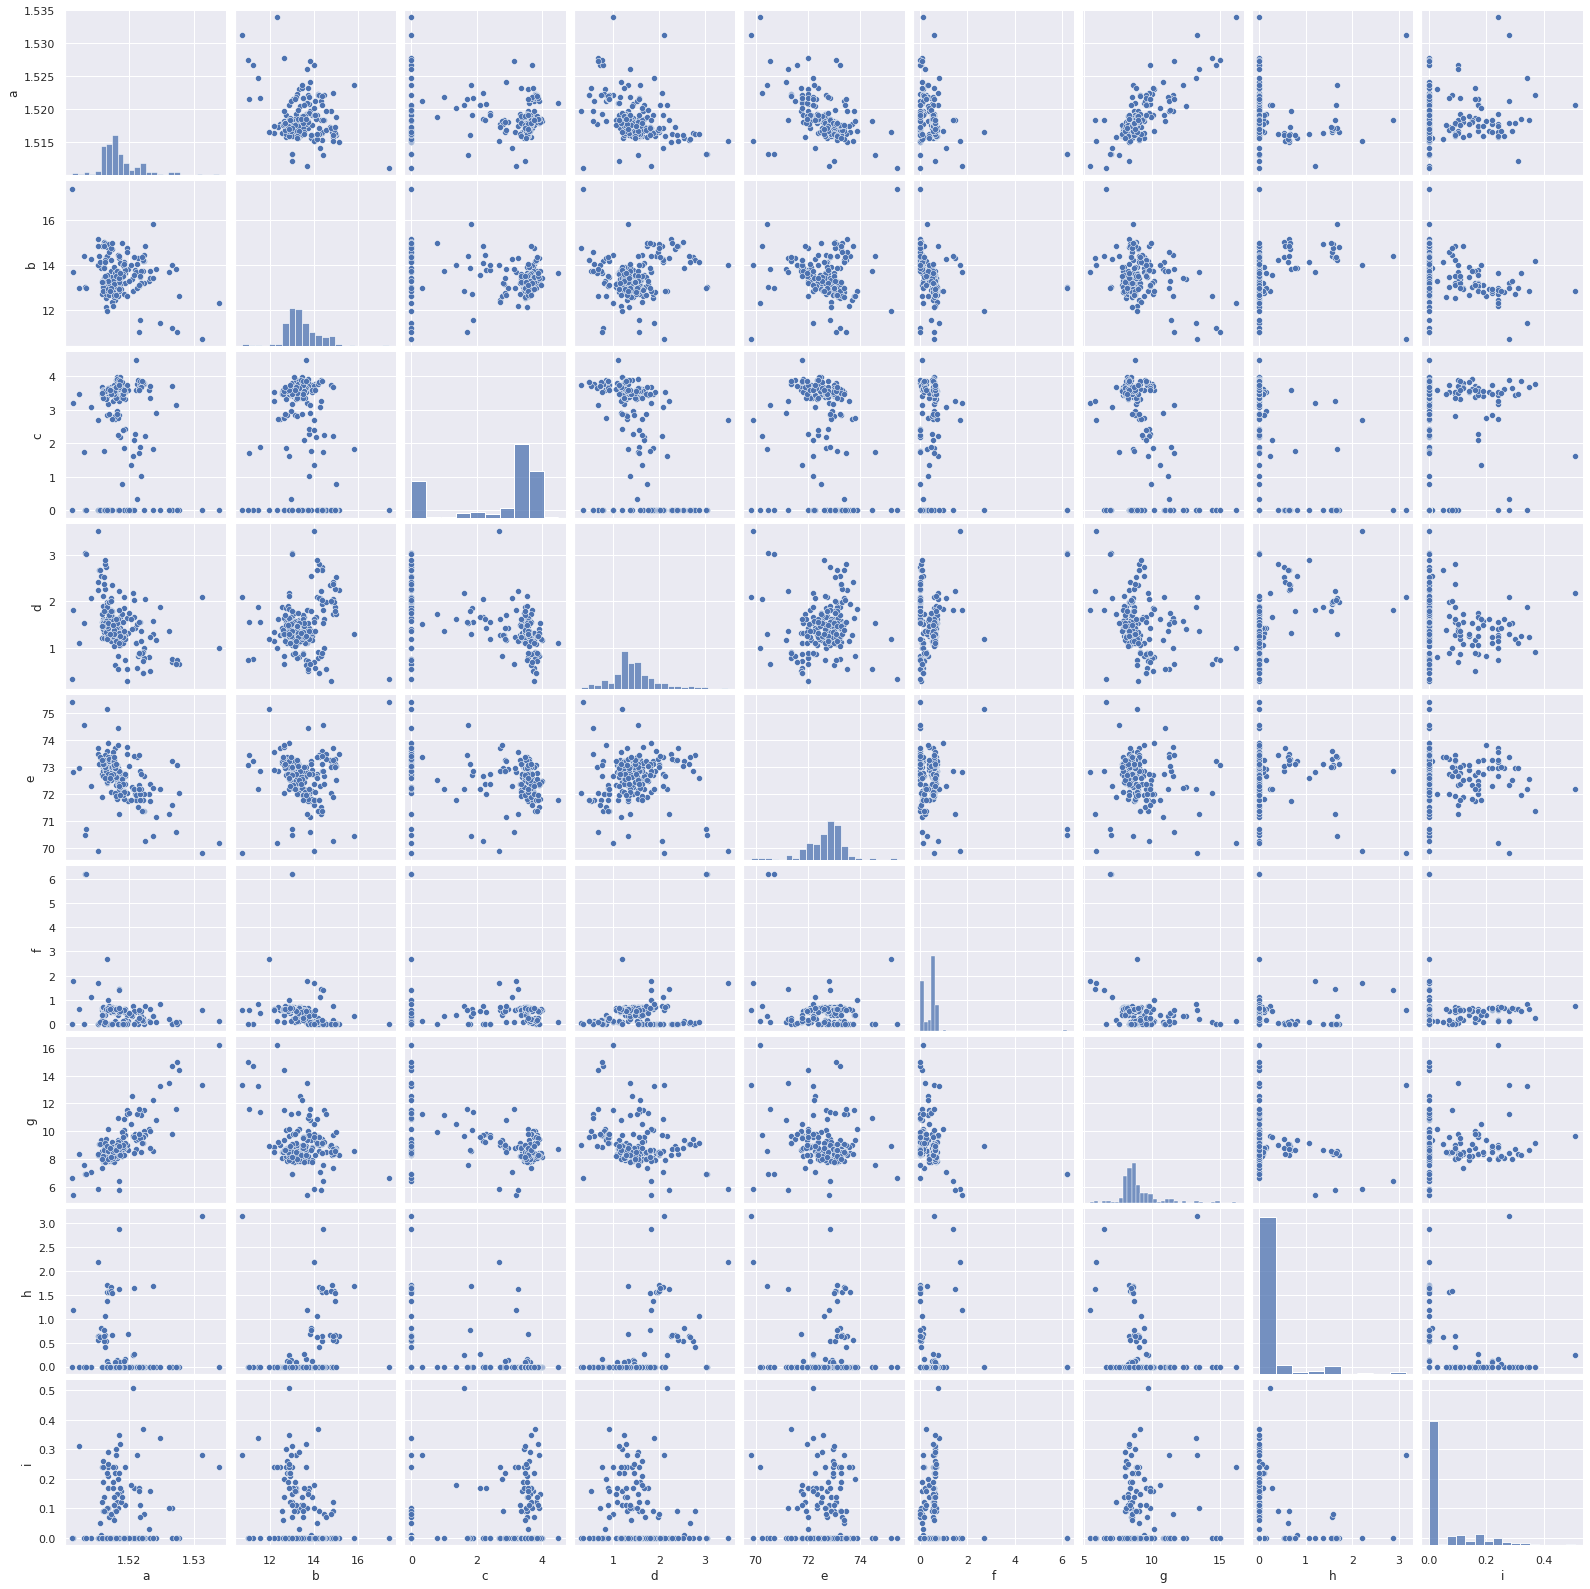

In [15]:
# Draw scatterplot across the additives to roughly visualize the relationship between the additives.
sns.pairplot(df)

### C) A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [16]:
from sklearn.cluster import KMeans, DBSCAN
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from mpl_toolkits.mplot3d import Axes3D


In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])


Based on above codes, I have scaled the dataset using Standard Scaler & decompose it into 2 principal components as part of dimensionality reduction procedure.

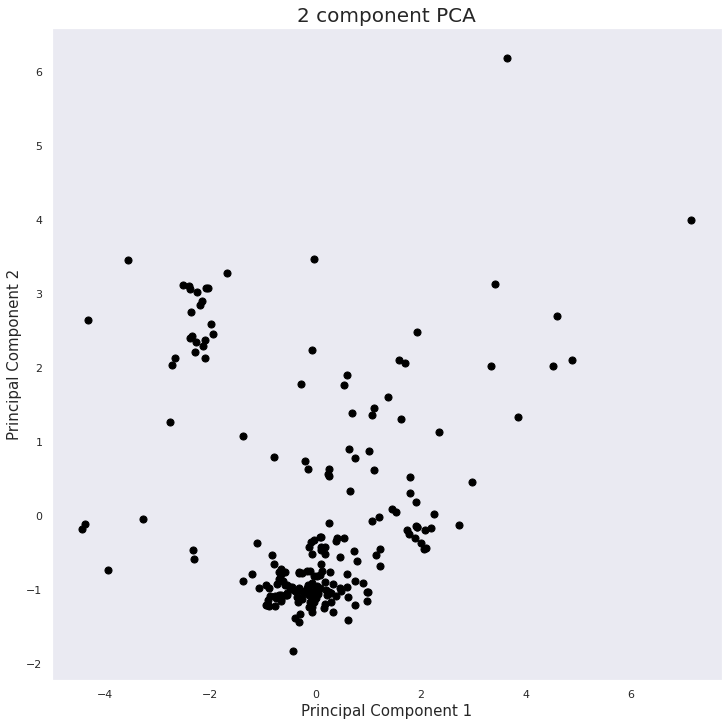

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['PC 1'], principalDf['PC 2'], c = 'black', s = 50)
ax.grid()


In [20]:
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 ])

In [21]:
np.sum(pca.explained_variance_ratio_)

0.5068039901112688

Principal component 1 & 2 was plotted into a graph. Principal component 1 & 2 were composed of 0.27% & 0.22% of variance from the original dataset. The total variance covered by both Principal Components were 0.5068%

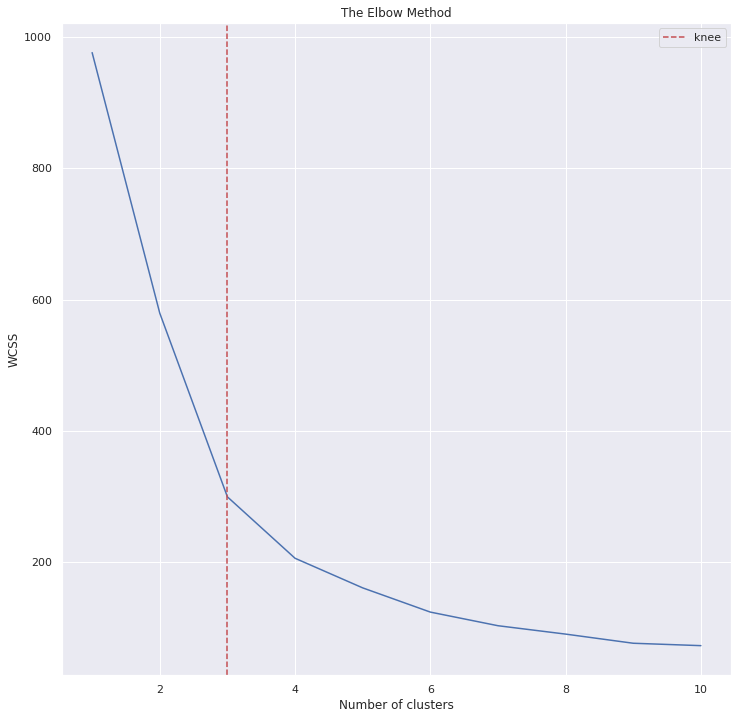

In [22]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(principalDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

knee = KneeLocator(np.arange(1,11), wcss, curve='convex', direction='decreasing')
plt.axvline(knee.knee, color='r', linestyle='--', label='knee')

plt.legend()


Elbow method was used to find out the optimal cluster to used in K Means clustering algorithm. WCSS is the sum of squared distance between each point and the centroid in a cluster. As the number of clusters increases, the WCSS value will start to decrease.

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(principalDf)
y_kmeans

array([1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2], dtype=int32)

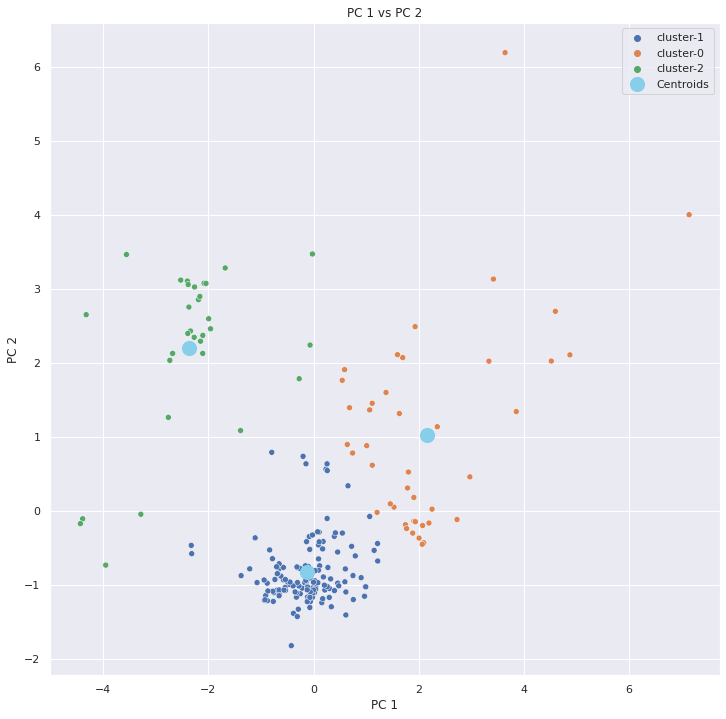

In [24]:
sns.scatterplot(principalDf['PC 1'], principalDf['PC 2'], hue=['cluster-{}'.format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='skyblue', label='Centroids')
plt.title('PC 1 vs PC 2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

Clustering the principal components using K Means algorithm which been plotted into 3 clusters. K Means is really senstive to outliers as it considers it as one of the cluster as well. In graph above, K Means predicted there are 3 formulation existed based on the created principal components.

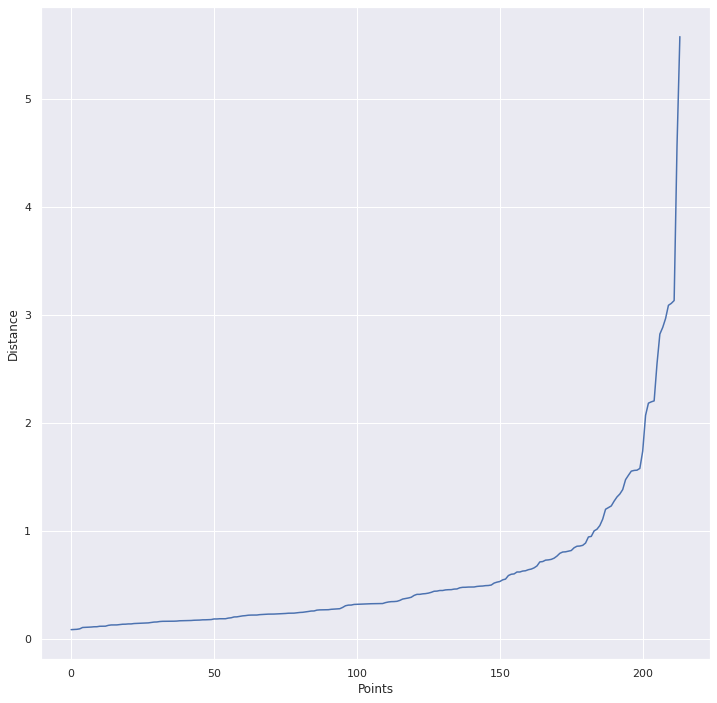

In [25]:
nearest_neighbors= NearestNeighbors(n_neighbors=11)

neighbors = nearest_neighbors.fit(principalDf)
distances, indices = neighbors.kneighbors(principalDf)
distances = np.sort(distances[:,10], axis=0)
i= np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure()
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

<Figure size 864x864 with 0 Axes>

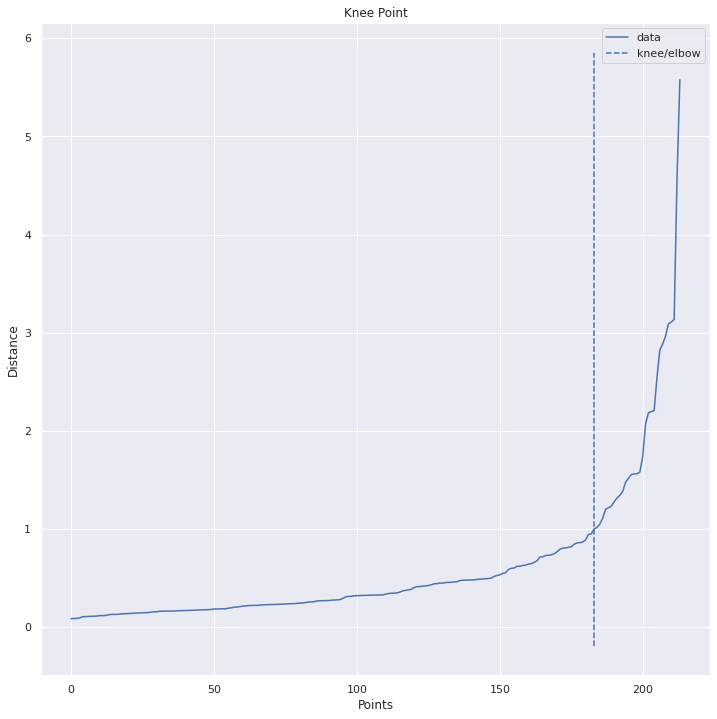

1.001480585295081


In [26]:
fig = plt.figure()
knee.plot_knee(figsize=(12,12))
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
print(distances[knee.knee])

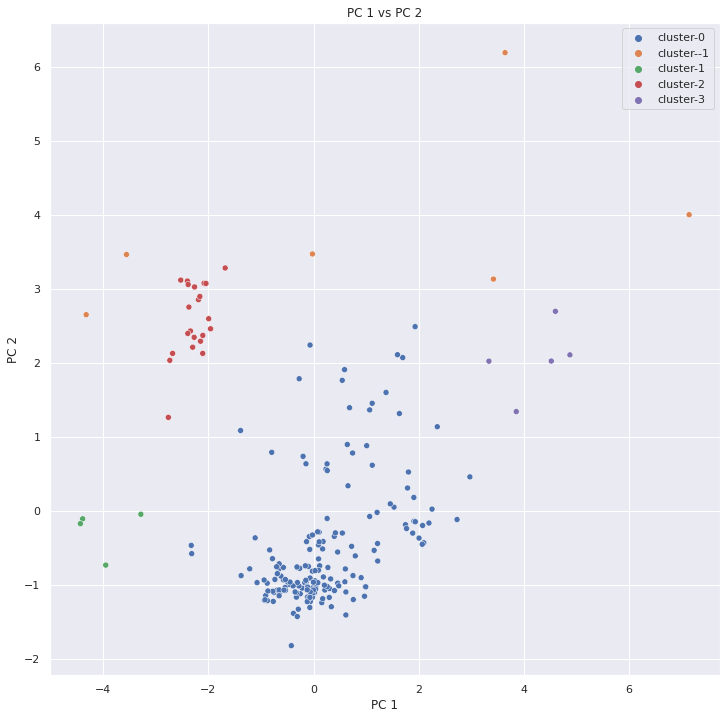

In [27]:
db= DBSCAN(eps=distances[knee.knee], min_samples=3).fit(principalDf)
labels = db.labels_
fig = plt.figure()
sns.scatterplot(principalDf['PC 1'], principalDf['PC 2'], hue=["cluster-{}".format(x) for x in labels])
plt.title('PC 1 vs PC 2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

DBSCAN algorithm was tested as well with the principal components. DBSCAN is more robust with outliers as it excluded them from any cluster. It detects there are 4 difference clusters / formulation exist in the dataset instead. In graph above, cluster -1 is consider as outliers.